In [1]:
from drawing_bot_api.trajectory_optimizer.simulator import Simulator, ExponentialDecaySimulator
from drawing_bot_api.trajectory_optimizer.fourier_compensator import FourierCompensator
from drawing_bot_api.trajectory_optimizer.shape_generator import ShapeGenerator
from drawing_bot_api.commands import DrawingBot
from drawing_bot_api.trajectory_optimizer.image_processor import ImageProcessor
from drawing_bot_api.trajectory_optimizer.utils import Scheduler
from drawing_bot_api.trajectory_optimizer.config_fourier import *
from drawing_bot_api.trajectory_optimizer.rl_fourier import RlModel

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import signal

DEBUG_MODE = True

%matplotlib agg

np.set_printoptions(threshold=np.inf)

2025-01-31 19:32:29.032059: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

def timeout_handler(signum, frame):
    raise TimeoutError("timeout occured")

signal.signal(signal.SIGALRM, timeout_handler)

<Handlers.SIG_DFL: 0>

In [3]:
drawing_bot = DrawingBot()
simulator = Simulator()
compensator = FourierCompensator()
shape_generator = ShapeGenerator()
image_processor = ImageProcessor()
model = RlModel()

Unit set to "mm".


In [4]:
def plot_graph(data, labels, scale='linear', axis_labels=['x', 'y']):
    plt.yscale(scale)
    for _i in range(len(data)):
        plt.xlabel(axis_labels[0])
        plt.ylabel(axis_labels[1])
        plt.plot(data[_i], label=labels[_i])
    if labels[0] is not None:
        plt.legend(bbox_to_anchor=(1, 1.15), ncol=3)  
    plt.show() 

In [5]:
def get_trajectory():
    for shape in shape_generator():
        drawing_bot.add_shape(shape)
    trajectory = np.array(drawing_bot._get_all_points())
    template = drawing_bot.plot(training_mode=True, points=trajectory)
    drawing_bot.shapes.clear()
    return trajectory, template

In [6]:
def get_set_of_trajectories(nr=10):
    _trajectories = []
    _templates = []
    for _ in range(nr):
        while True:
            signal.alarm(3)
            
            try:
                print(f'Generating shape {_}...')
                clear_output(wait=True)
                _trajectory, _template = get_trajectory()
                _trajectories.append(_trajectory)
                _templates.append(_template)
                break
            except Exception as e:
                print(f'Timeout occured')
            finally:
                signal.alarm(0)
                
    signal.alarm(0)
    return _trajectories, _templates

In [7]:
def get_template_rewards(simulator, trajectories, templates):
    _rewards = []
    for _index in range(len(templates)):
        simulated_trajectory = simulator(trajectories[_index])
        drawing = drawing_bot.plot(training_mode=True, points=simulated_trajectory)
        _rewards.append(image_processor(templates[_index], drawing, save_images=False))
    return _rewards

In [8]:
def test_parameters(parameters, trajectory, template):
    compensated_trajectory, _, _ = compensator(trajectory, type='fourier', parameters=parameters)
    simulated_trajectory = simulator(compensated_trajectory)
    drawing = drawing_bot.plot(training_mode=True, points=simulated_trajectory)
    reward = image_processor(template, drawing, save_images=False)
    return reward, drawing

0 	| Params: [ 0.71  0.54  0.25 -0.19  0.14  0.65  0.63 -1.08 -0.01] 	| Reward: 0.093 / 0.733 	| Sigma: 0.05
1 	| Params: [ 0.73  0.42  0.25 -0.27  0.08  0.63  0.68 -1.09 -0.13] 	| Reward: 0.062 / 0.733 	| Sigma: 0.05
2 	| Params: [ 0.77  0.46  0.3  -0.15  0.22  0.68  0.67 -1.13 -0.03] 	| Reward: 0.126 / 0.733 	| Sigma: 0.05
3 	| Params: [ 0.77  0.54  0.25 -0.25  0.08  0.69  0.67 -1.11 -0.11] 	| Reward: 0.106 / 0.733 	| Sigma: 0.05
4 	| Params: [ 0.77  0.42  0.21 -0.31  0.09  0.64  0.61 -1.09 -0.07] 	| Reward: 0.084 / 0.733 	| Sigma: 0.05
5 	| Params: [ 0.77  0.49  0.19 -0.22  0.08  0.63  0.68 -1.13 -0.14] 	| Reward: 0.098 / 0.733 	| Sigma: 0.05
6 	| Params: [ 0.77  0.45  0.25 -0.24  0.18  0.62  0.67 -1.15 -0.21] 	| Reward: 0.12 / 0.733 	| Sigma: 0.05
7 	| Params: [ 0.71  0.45  0.28 -0.27  0.17  0.53  0.71 -1.16 -0.19] 	| Reward: 0.122 / 0.733 	| Sigma: 0.05
8 	| Params: [ 0.75  0.4   0.25 -0.22  0.09  0.6   0.67 -1.06 -0.22] 	| Reward: 0.045 / 0.733 	| Sigma: 0.05
9 	| Params: [ 0.8  

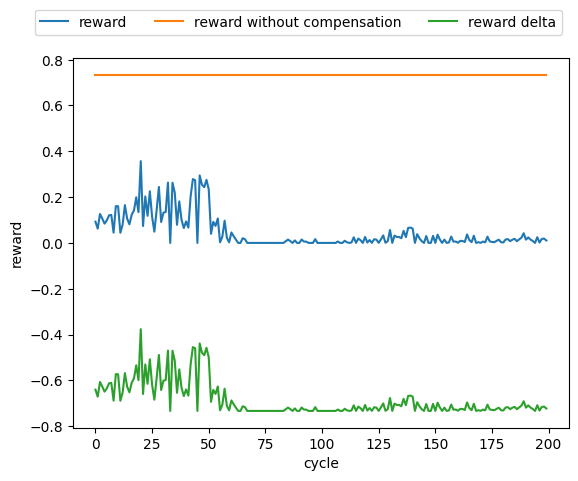

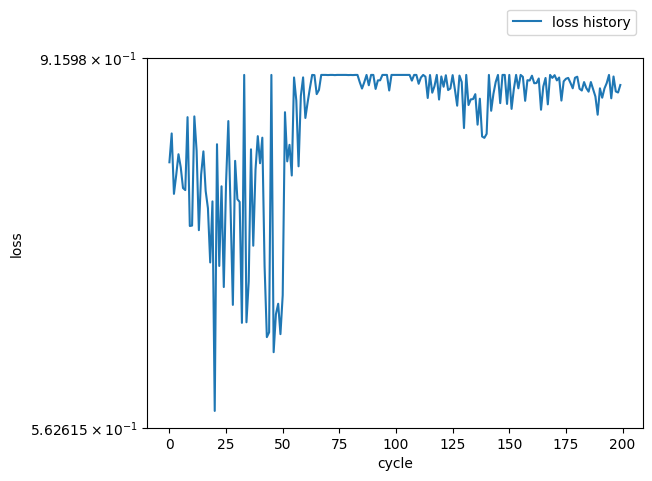

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/leon/Documents/Dateien/Privat/Projekte/Bachelorarbeit/Project/MIRMI_2DOF_Drawing_Bot/code/api/venv/lib/python3.12/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/leon/Documents/Dateien/Privat/Projekte/Bachelorarbeit/Project/MIRMI_2DOF_Drawing_Bot/code/api/venv/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/leon/Documents/Dateien/Privat/Projekte/Bachelorarbeit/Project/MIRMI_2DOF_Drawing_Bot/code/api/venv/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 739, in start
    self.io_loop.start()
  File "/Users/leon/Documents/Dateien/Privat/Projekte/Bachelorarbeit/Project/MIRMI_2DOF_Drawing_Bot/code/api/venv/lib/python3.12/site-packages/tornado/platform/asyncio.py", line 205, in start
    self.asynci

: 

In [9]:
reward_history = []
template_reward_history = []
trajectories, templates = get_set_of_trajectories(NUMBER_OF_SAMPLES)
template_rewards = get_template_rewards(simulator, trajectories, templates)
sigma_schedule = Scheduler(RL_ACTION_VAR_BASE, RL_ACTION_VAR_DECAY)

for cycle in range(CYCLES):
    signal.alarm(10)

    sigma = sigma_schedule()
    
    trajectory_index = np.random.randint(0, NUMBER_OF_SAMPLES)
    trajectory = trajectories[trajectory_index]
    template = templates[trajectory_index]
    template_reward = template_rewards[trajectory_index]

    params = model.get_parameters(trajectory)
    params += np.random.normal(0, sigma, np.shape(params))
    reward, drawing = test_parameters(params, trajectory, template)
    model.train(trajectory, params, reward, template_reward, sigma)
    print(f'{cycle} \t| Params: {np.round(params, 2)} \t| Reward: {np.round(reward, 3)} / {np.round(template_reward, 3)} \t| Sigma: {np.round(sigma, 3)}')

    # append results to histories
    reward_history.append(reward)
    template_reward_history.append(template_reward)

    if cycle % 10 == 9:
            image_processor.save_image(drawing, 'fourier_rl', 'cycle', nr=cycle)

    plt.close('all')

%matplotlib inline

reward_delta = np.array(reward_history) - np.array(template_reward_history)
plot_graph([reward_history, template_reward_history, reward_delta], ['reward', 'reward without compensation', 'reward delta'], scale='linear', axis_labels=['cycle', 'reward'])
plot_graph([model.loss_history.losses], ['loss history'], scale='symlog', axis_labels=['cycle', 'loss'])